<a href="https://colab.research.google.com/github/vf-fontes/intro-cd/blob/master/20200930_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLIST E-COMMERCE
Autor: Vinicius Fontes

OBJETIVO:  Realizar análise descritiva de um conjunto de Datasets do Marketplace OLIST. Apartir desta análises verificar possibilidade de utilização de algoritmos de Machine Learning para conclusões preditivas.

*   Dataset Original: *https://www.kaggle.com/olistbr/brazilian-ecommerce*

Lista de Datasets:
*  olist_orders_dataset: Informações sobre as compras realizadas => **[DATASET PRINCIPAL]**
* olist_customers_dataset: Informações sobre os clientes bem como sua localização
* olist_geolocation_dataset: Códigos postais das cidades brasileiras e suas geolocalizações
* olist_order_items_dataset: Informações sobre produtos comprados em cada compra
* olist_order_payments_dataset: Informações sobre formas de pagamentos
* olist_order_reviews_dataset: Avaliações realizadas pelos clientes
* olist_products_dataset: Informação sobre os produtos à venda
* olist_sellers_dataset: Informações sobre o vendedor
* product_category_name_translation: Nomes dos produtos em lingua inglesa


# Instalando Bilbiotecas

In [1]:
!pip install gitly
!pip install pycep-correios
!pip install unidecode

     |████████████████████████████████| 13.1MB 316kB/s 
     |████████████████████████████████| 74.0MB 1.3MB/s 
  Created wheel for gitly: filename=gitly-1.1.4-cp36-none-any.whl size=4523 sha256=a26613557cf0ca74f80a7ef74c267584f19a5404c48de9bfe4177efc284ef7d0
  Stored in directory: /root/.cache/pip/wheels/41/5c/0b/6cd3a688991c83f17c948adf0775f7907a0406d1119bd809af
Successfully built gitly
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 102kB 3.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 245kB 3.4MB/s 


# Importando Bibliotecas

In [2]:
# Bibliotecas de Métodos Necessários
import pandas as pd
import numpy as np
from gitly.colab.plot import GitlyPlotter
import plotly.express as px
import pycep_correios
from unidecode import unidecode
from plotly.subplots import make_subplots

# Importando Datasets

In [103]:
df_clientes = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('//content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/TIAGO [Introdução a Ciência de Dados]/Datasets/olist_sellers_dataset.csv')
df_cidades_brasil = pd.read_csv('/content/drive/My Drive/PORTIFOLIO/Datasets Importantes/BRAZIL_CITIES.csv', delimiter=';')

# Dataset de Clientes (Customers)

## Pré-processamento

In [4]:
# Verificando existência de valores nulos
df_clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Conhecendo a estrutura do Dataset

In [5]:
# Visualização do Dataset
df_clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Dimensões do dataset
print('DImensões do Dataset: ',df_clientes.shape)

DImensões do Dataset:  (99441, 5)


In [7]:
# Dimensões das features e instâncias
df_clientes.agg(['nunique','count','size'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


## Explorando o Dataset




### Cidades / Estados que contenham clientes

In [8]:
# Quais cidades tem no meu dataset
cidades_clientes = np.sort(np.array([df_clientes.customer_city.unique()]))
print('Quantidade de cidades que há clientes:', cidades_clientes.size)
print('Cidades que há clientes no dataset: ', cidades_clientes)

Quantidade de cidades que há clientes: 4119
Cidades que há clientes no dataset:  [['abadia dos dourados' 'abadiania' 'abaete' ... 'zacarias' 'ze doca'
  'zortea']]


In [9]:
# Quais estados tem no meu dataset
estados_clientes = df_clientes.customer_state.unique()
print('Estados únicos encontradas no dataset: ', np.sort(estados_clientes))

Estados únicos encontradas no dataset:  ['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [10]:
# Quantidade de estados únicos
print('Quantidade de estados Únicos: ',len(estados_clientes))

Quantidade de estados Únicos:  27


In [11]:
# Transformando instâncias de cidades_brasil para minúsuculas e retirando acentos
df_cidades_brasil['CITY'] = df_cidades_brasil.apply(lambda x: x['CITY'].lower(), axis = 1)
df_cidades_brasil['CITY'] = df_cidades_brasil.apply(lambda x: unidecode(x['CITY']), axis = 1)
cidades_brasil = np.array([df_cidades_brasil.CITY])
cidades_brasil = np.sort(cidades_brasil)

### Cidades / Estados que não contenham clientes

In [12]:
# Resumo sobre cidades que contenham clientes ou não
print('Quantidade de cidades que há clientes:', cidades_clientes.size)
print('Quantidade de cidades no Brasil :',cidades_brasil.size)
print('Quantidade de cidades que ainda não tem cliente: ',cidades_brasil.size - cidades_clientes.size)
print('Oportunidade de divulgação em %.2f%% das cidades brasileiras'%(((cidades_brasil.size - cidades_clientes.size)/cidades_brasil.size)*100))

Quantidade de cidades que há clientes: 4119
Quantidade de cidades no Brasil : 5573
Quantidade de cidades que ainda não tem cliente:  1454
Oportunidade de divulgação em 26.09% das cidades brasileiras


In [13]:
# Visualizando cidades brasileiras e cidades que há clientes
print('Cidades brasileiras: ', cidades_brasil)
print('Cidades que há clientes: ',cidades_clientes)

Cidades brasileiras:  [['abadia de goias' 'abadia dos dourados' 'abadiania' ... 'zacarias'
  'ze doca' 'zortea']]
Cidades que há clientes:  [['abadia dos dourados' 'abadiania' 'abaete' ... 'zacarias' 'ze doca'
  'zortea']]


In [14]:
# Quais cidades que ainda não tem clientes
cidades_sem_clientes = []
for i in cidades_brasil[0]:
  if i not in cidades_clientes:
    cidades_sem_clientes.append(i)
print('Cidades que não há clientes: ',cidades_sem_clientes)
print(len(cidades_sem_clientes))

Cidades que não há clientes:  ['abadia de goias', 'abel figueiredo', 'abreulandia', 'acara', 'acarape', 'acaua', 'acorizal', 'acrelandia', 'adelandia', 'afonso bezerra', 'afonso cunha', 'afua', 'agricolandia', 'agua azul do norte', 'agua doce do maranhao', 'agua fria', 'aguanil', 'aguas de chapeco', 'agudos do sul', 'aguiar', 'aguiarnopolis', 'aiquara', 'alagoinha do piaui', 'albertina', 'alcantaras', 'alcantil', 'aldeias altas', 'alecrim', 'alenquer', 'algodao de jandaira', 'almadina', 'almeirim', 'aloandia', 'altair', 'altamira do maranhao', 'alto alegre dos parecis', 'alto feliz', 'alto longa', 'alto paraguai', 'alvaraes', 'alvinlandia', 'alvorada de minas', 'alvorada do sul', 'amajari', 'amapa', 'amaral ferrador', 'amaralina', 'amarante do maranhao', 'amatura', 'amorinopolis', 'amparo de sao francisco', 'amparo do serra', 'anahy', 'anajas', 'anajatuba', 'anama', 'anapu', 'anapurus', 'angelandia', 'angelim', 'angico', 'anhanguera', 'anisio de abreu', 'anori', 'antas', 'antonio almei

In [15]:
# Criando um novo Dataframe com dados das cidades que não tenham clientes
df_cidades_sem_clientes = df_cidades_brasil.loc[df_cidades_brasil['CITY'].isin(cidades_sem_clientes)]
df_cidades_sem_clientes.head(3)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,abadia de goias,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,318.0,438.0,517.0,3542.0,416.0,319.0,1843.0,1689.0,0.708,0.687,0.830,0.622,-49.440548,-16.758812,893.60,360.0,842.0,147.26,NaN,NaN,8583.0,Urbano,6.20,27991.25,74750.32,36915.04,145857.60,20554.20,166.41,...,20664.57,Demais serviços,28227691.0,284.0,5.0,1.0,56.0,0.0,2.0,29.0,110.0,26.0,4.0,5.0,0.0,2.0,10.0,12.0,4.0,6.0,6.0,1.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
10,abel figueiredo,PA,0,6780.0,6780.0,0.0,1880.0,1650.0,230.0,5998.0,102.0,471.0,609.0,691.0,3657.0,468.0,1184.0,4168.0,3657.0,0.622,0.625,0.800,0.481,-48.396762,-4.951391,192.76,248.0,43.0,614.13,Amazônia Atlântica,E,7382.0,Intermediário Adjacente,21381.59,5.31,20515.48,27736.46,74947.67,4709.92,79657.59,...,11095.92,"Administração, defesa, educação e saúde públic...",NaN,72.0,0.0,0.0,9.0,0.0,1.0,0.0,41.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,6.0,6.0,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,11709575.0,279.0,807.0,0.0,NaN,NaN,NaN,1.0
14,abreulandia,TO,0,2391.0,2391.0,0.0,760.0,445.0,315.0,1476.0,21.0,107.0,172.0,182.0,872.0,122.0,13102.0,31281.0,2786.0,0.665,0.700,0.835,0.502,-49.162438,-9.621791,238.86,14.0,29.0,"1,895.21",NaN,NaN,2564.0,Rural Adjacente,20312.55,2108.24,6802.38,16520.91,45744.07,1634.18,47378.25,...,18543.35,"Administração, defesa, educação e saúde públic...",9712530.0,27.0,4.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,318.0,0.0,NaN,NaN,NaN,1.0


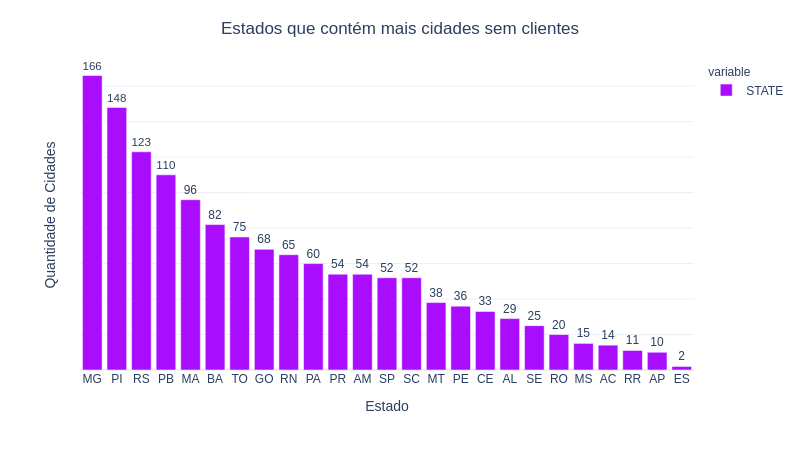

In [16]:
# Estados que contém mais cidades sem clientes
gitly = GitlyPlotter('github')
data=df_cidades_sem_clientes.STATE.value_counts()
fig = px.bar(data,labels={'value': 'Quantidade de Cidades', 'index':'Estado'},text=data,color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white',)
fig.update_layout(title={'text' :'Estados que contém mais cidades sem clientes','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_yaxes(showticklabels=False)
gitly.show(fig)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


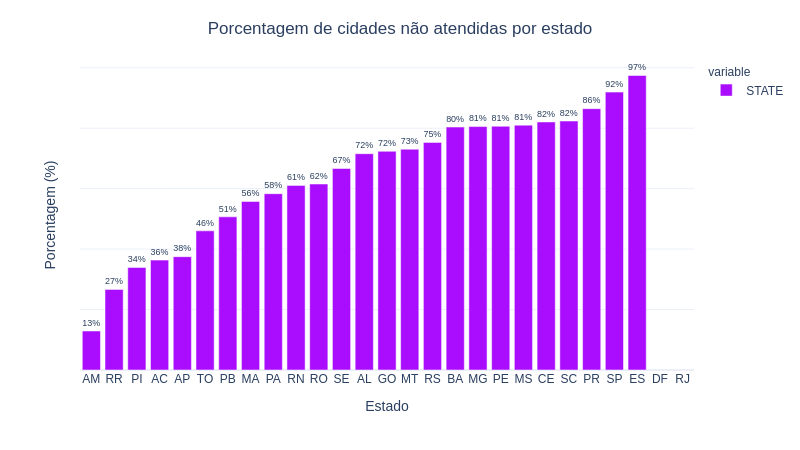

In [17]:
data = 100-((df_cidades_sem_clientes.STATE.value_counts()*100)/df_cidades_brasil.STATE.value_counts())
fig = px.bar(data.sort_values(ascending=True),labels={'value': 'Porcentagem (%)', 'index':'Estado'},text=data.sort_values(ascending=True),color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
fig.update_layout(title={'text' :'Porcentagem de cidades não atendidas por estado','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.update_yaxes(showticklabels=False)
gitly.show(fig)

População total das cidades que não tem clientes cadastrados: 3793954
População total das cidades que não tem clientes cadastrados por estado: 
 STATE
ES      3975.0
AP     26620.0
RR     32287.0
RO     44575.0
MS     47935.0
SC     55728.0
AC     62960.0
MT     81079.0
PR     82702.0
SE     84398.0
AL     91377.0
CE    112340.0
PE    114877.0
TO    117577.0
GO    136450.0
RS    145805.0
RN    167405.0
SP    183923.0
PI    226145.0
PB    238491.0
MG    285142.0
BA    287151.0
MA    369939.0
PA    374196.0
AM    420877.0
Name: IBGE_15-59, dtype: float64


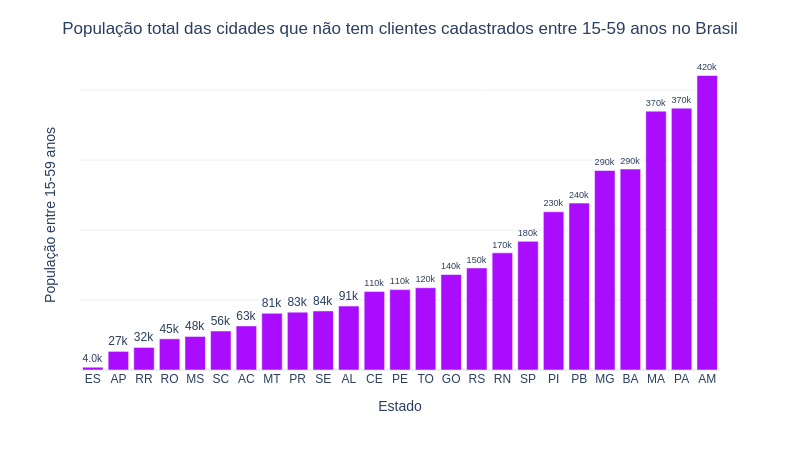

In [18]:
# Levando em consideração que marjoritariamente a população que realiza compras onlines são adolescentes e adultos, 
# podemos considerar que a feature "IBGE_15-59" é o Potencial público alvo que OLIST poderia buscar como clientes
print('População total das cidades que não tem clientes cadastrados: %.i'%df_cidades_sem_clientes['IBGE_15-59'].sum())
print('População total das cidades que não tem clientes cadastrados por estado: \n',df_cidades_sem_clientes.groupby('STATE')['IBGE_15-59'].sum().sort_values(ascending=True))
data=df_cidades_sem_clientes.groupby(by='STATE').sum().sort_values(by='IBGE_15-59',ascending=True)
fig = px.bar(data, y='IBGE_15-59',labels={'IBGE_15-59': 'População entre 15-59 anos', 'STATE':'Estado'},text='IBGE_15-59',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
fig.update_layout(title={'text' :'População total das cidades que não tem clientes cadastrados entre 15-59 anos no Brasil','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(showticklabels=False)
gitly.show(fig)

In [19]:
# Quais estados existe ao menos um cliente em todas as cidades
estados_com_todas_cidades_clientes = []
estados_brasil = df_cidades_brasil.STATE.unique()
estados_com_cidades_sem_clientes = df_cidades_sem_clientes.STATE.unique()
for i in estados_brasil:
  if i not in estados_com_cidades_sem_clientes:
    estados_com_todas_cidades_clientes.append(i)
print('Estados que todas as cidades tem ao menos um cliente: ',estados_com_todas_cidades_clientes)

Estados que todas as cidades tem ao menos um cliente:  ['RJ', 'DF']


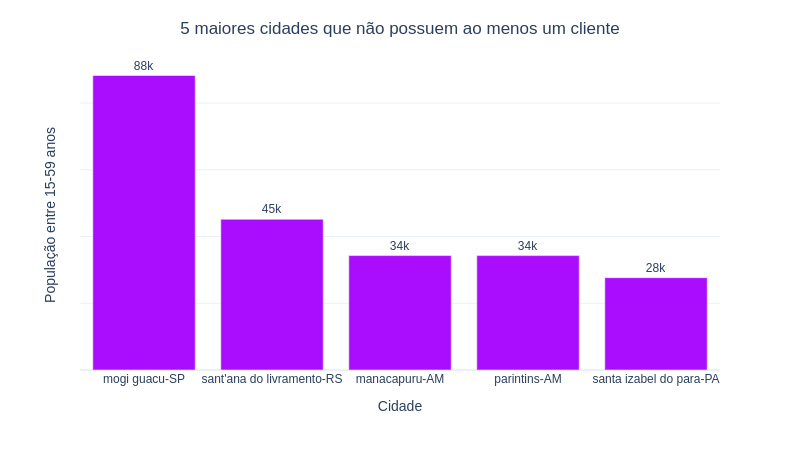

In [20]:
# 5 maiores cidades que não possuem um único cliente
data = df_cidades_sem_clientes[['CITY','IBGE_15-59','STATE']].sort_values('IBGE_15-59',ascending=False).head(5)
data['CITY_STATE']=data['CITY']+'-'+data['STATE']
fig = px.bar(data,x='CITY_STATE',y='IBGE_15-59', labels={'IBGE_15-59': 'População entre 15-59 anos', 'CITY_STATE':'Cidade'},text='IBGE_15-59',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
fig.update_layout(title={'text' :'5 maiores cidades que não possuem ao menos um cliente','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(showticklabels=False)
gitly.show(fig)

### Relação de clientes por Cidades / Estados

In [21]:
# Quantidade de clientes que realizaram ao menos um compra
print('Quantidade de clientes que já realizaram compras pela OLIST: ', len(df_clientes.customer_id.unique()))

Quantidade de clientes que já realizaram compras pela OLIST:  99441


In [22]:
# Quantidade de clientes únicos que já realizaram compras
print('Quantidade de clientes únicos que já realizaram compras pela OLIST: ', df_clientes.customer_unique_id.nunique())

Quantidade de clientes únicos que já realizaram compras pela OLIST:  96096


In [23]:
# Ranking da quantidade total de clientes por cidade
df_clientes.groupby(by='customer_city').count().sort_values(by='customer_unique_id', ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
...,...,...,...,...
ibiara,1,1,1,1
rio espera,1,1,1,1
rio dos indios,1,1,1,1


In [24]:
# Ranking de clientes que mais realizaram pedidos no dataset
df_temp = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_temp.sort_values(by='customer_id', ascending=False)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,17,17,17
3e43e6105506432c953e165fb2acf44c,9,9,9,9
6469f99c1f9dfae7733b25662e7f1782,7,7,7,7
ca77025e7201e3b30c44b472ff346268,7,7,7,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7
...,...,...,...,...
5657dfebff5868c4dc7e8355fea865c4,1,1,1,1
5657596addb4d7b07b32cd330614bdf8,1,1,1,1
5656eb169546146caeab56c3ffc3d268,1,1,1,1


In [25]:
# Clientes que realizaram dois pedidos ou mais através da OLIST
df_group = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_group[ (df_group['customer_id'] >= 2)].head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
00172711b30d52eea8b313a7f2cced02,2,2,2,2
004288347e5e88a27ded2bb23747066c,2,2,2,2
004b45ec5c64187465168251cd1c9c2f,2,2,2,2
0058f300f57d7b93c477a131a59b36c3,2,2,2,2
00a39521eb40f7012db50455bf083460,2,2,2,2


In [26]:
# Clientes que realizaram quatro pedidos ou mais através da OLIST
df_group = df_clientes.groupby( by = 'customer_unique_id' ).count()
df_group[ (df_group['customer_id'] >= 4)].head(5)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
083ca1aa470c280236380973a48f77c6,4,4,4,4
08e5b38d7948d37fbb2a59fc5e175ab1,4,4,4,4
12d8b5ed661190a3a08183644dfc504d,4,4,4,4
12f5d6e1cbf93dafd9dcc19095df0b3d,6,6,6,6
1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,7,7


In [27]:
# Removendo Duplicatas de valores para utilizar valores unicos
df_clientes_unique = df_clientes.drop_duplicates('customer_unique_id',keep='first')
df_clientes_unique.shape

(96096, 5)

            index  customer_city
0       sao paulo          14971
1  rio de janeiro           6611
2  belo horizonte           2671
3        brasilia           2066
4        curitiba           1462
5        campinas           1397
6    porto alegre           1326


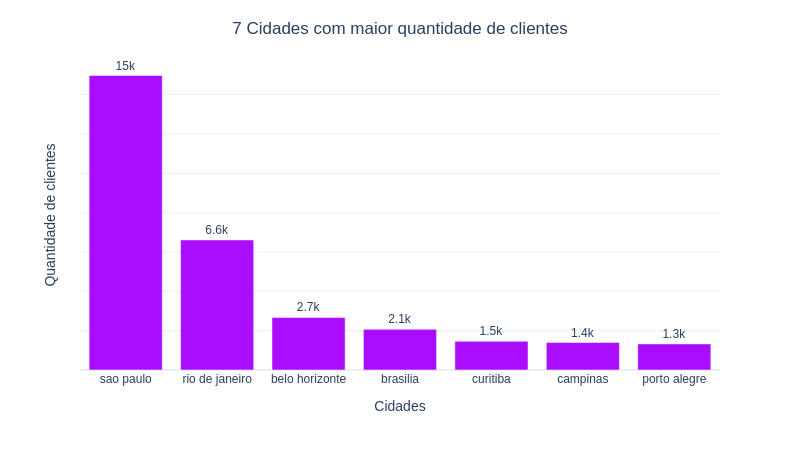

In [28]:
# Ranking com as 7 cidades com maior quantidade de clientes
data = df_clientes_unique.customer_city.value_counts().head(7).reset_index()
fig = px.bar(data,x='index', y='customer_city',text='customer_city',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white',labels={'index': 'Cidades', 'customer_city':'Quantidade de clientes'})
fig.update_layout(title={'text' :'7 Cidades com maior quantidade de clientes','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(showticklabels=False)
print(df_clientes_unique.customer_city.value_counts().head(7).reset_index())
gitly.show(fig)

SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
SC     3529
BA     3276
Name: customer_state, dtype: int64


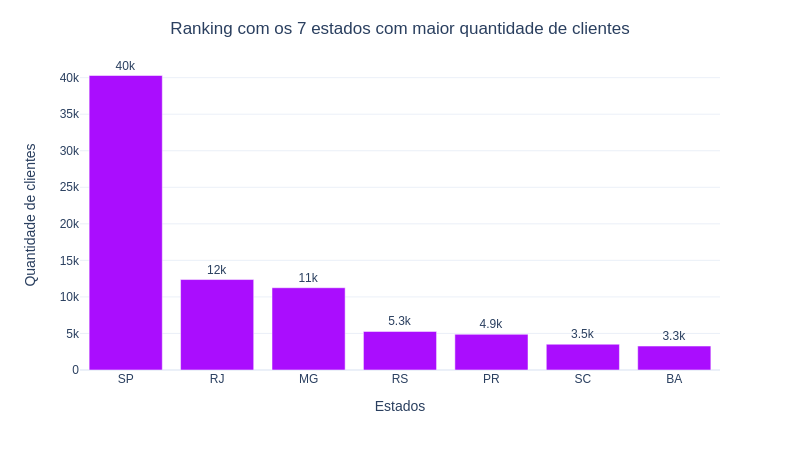

In [29]:
# Ranking com os 7 estados com maior quantidade de clientes
df_top5_estado = df_clientes_unique.customer_state.value_counts().head(7)
print(df_top5_estado)
fig = px.bar(df_top5_estado,y='customer_state',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white',labels={'index': 'Estados', 'customer_state':'Quantidade de clientes'},text='customer_state')
fig.update_layout(title={'text' :'Ranking com os 7 estados com maior quantidade de clientes','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
gitly.show(fig)

In [30]:
fig = make_subplots( rows=1, cols=2, column_titles= ['Cidades com mais clientes', 'Estados com mais clientes'] )
fig.add_bar( x=df_top5_cidade.index , y=df_top5_cidade, row=1, col=1 )
fig.add_bar( x=df_top5_estados.index, y=df_top5_estados, row=1, col=2 )
fig.update_layout( dict( {'title':'Clientes: Cidades vs Estados'} ) )
fig.update_layout( dict( {'showlegend':False} ) )
gitly.show(fig)

NameError: ignored

In [31]:
# Ranking com os 7 bairros com maior quantidade de clientes
df_top4_bairros = df_clientes_unique.customer_zip_code_prefix.value_counts().head(4).rename('qtd_clientes_bairro').reset_index()
df_top4_bairros

,index,qtd_clientes_bairro
0,22790,136
1,22793,119
2,24220,113
3,24230,112


In [32]:
# fonte https://imasters.com.br/back-end/python-consulta-de-cep-com-pycepcorreios
import pycep_correios

def bairro_cidade( cep ):
    end = pycep_correios.get_address_from_cep( str( cep ) + '000' )
    return '{} / {}'.format(end['bairro'], end['cidade'])

df_top4_bairros['distrito'] = df_top4_bairros['index'].apply( bairro_cidade )
df_top4_bairros

,index,qtd_clientes_bairro,distrito
0,22790,136,Recreio dos Bandeirantes / Rio de Janeiro
1,22793,119,Barra da Tijuca / Rio de Janeiro
2,24220,113,Icaraí / Niterói
3,24230,112,Icaraí / Niterói


# Dataset Produtos (Products)

## Estrutura do Dataset

In [33]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [34]:
df_produtos.shape

(32951, 9)

In [35]:
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


In [36]:
df_produtos.product_category_name.fillna(value='nao informado',inplace=True)
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,74,66,2960,19,2204,99,102,95
count,32951,32951,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


## Informações para o Negócio

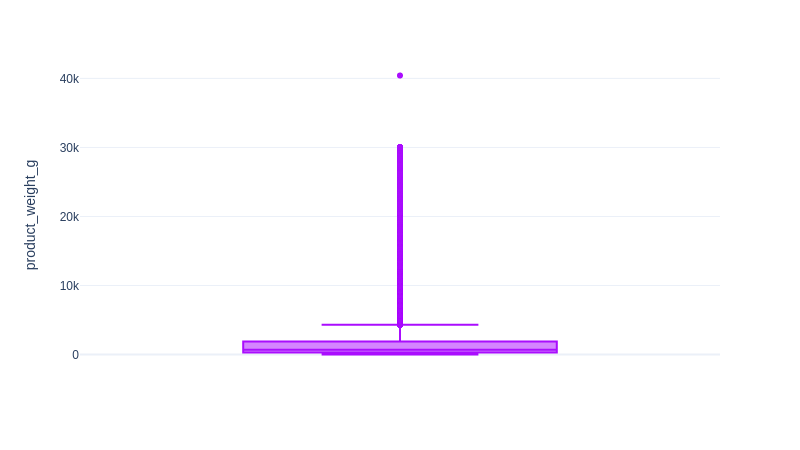

In [37]:
# Como esta a distribuição?
fig = px.box(df_produtos.product_weight_g, y="product_weight_g",color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
gitly.show(fig)

In [38]:
df_produtos.product_weight_g.median()
df_produtos.product_weight_g.mean()

2276.4724877841513

In [39]:
valor = df_produtos.product_weight_g.median()
df_produtos.product_weight_g.fillna(value=valor, inplace=True)

In [40]:
df_categorias_mais_vendidas = df_produtos.product_category_name.value_counts().head(5).rename('qtd_prod_cat_ofertados')
df_categorias_mais_vendidas

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: qtd_prod_cat_ofertados, dtype: int64

In [41]:
df_peso_medio_produtos = df_produtos.groupby( by='product_category_name' ).apply(np.mean)['product_weight_g']
df_peso_medio_produtos

product_category_name
agro_industria_e_comercio    5263.405405
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
                                ...     
sinalizacao_e_seguranca      2969.817204
tablets_impressao_imagem      381.444444
telefonia                     236.506173
telefonia_fixa                660.827586
utilidades_domesticas        3020.793576
Name: product_weight_g, Length: 74, dtype: float64

In [42]:
df_mais_vendidos_peso_medio = pd.merge(left=df_categorias_mais_vendidas,right=df_peso_medio_produtos,how='left',left_index=True, right_index=True)
df_mais_vendidos_peso_medio

,qtd_prod_cat_ofertados,product_weight_g
cama_mesa_banho,3029,2456.405084
esporte_lazer,2867,2024.670736
moveis_decoracao,2657,3008.266842
beleza_saude,2444,1434.793781
utilidades_domesticas,2335,3020.793576


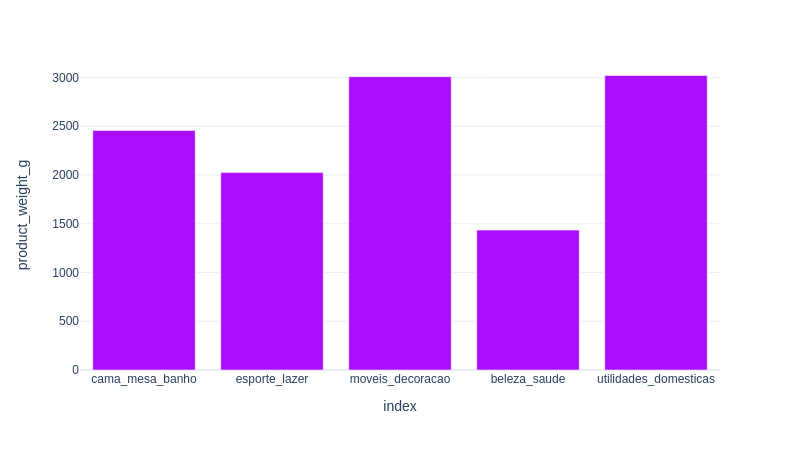

In [43]:
fig = px.bar(df_mais_vendidos_peso_medio, y='product_weight_g',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
gitly.show(fig)

# Dataset Pedidos (Orders)

## Estrutura da Tabela

In [44]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [45]:
df_compras.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [46]:
df_compras.fillna(method='ffill',inplace=True) # ffill: pega e repete o valor anterior nos faltantes
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


## Informações para o Negócio

In [47]:
df_compras.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [48]:
df_status = df_compras.order_status.value_counts()

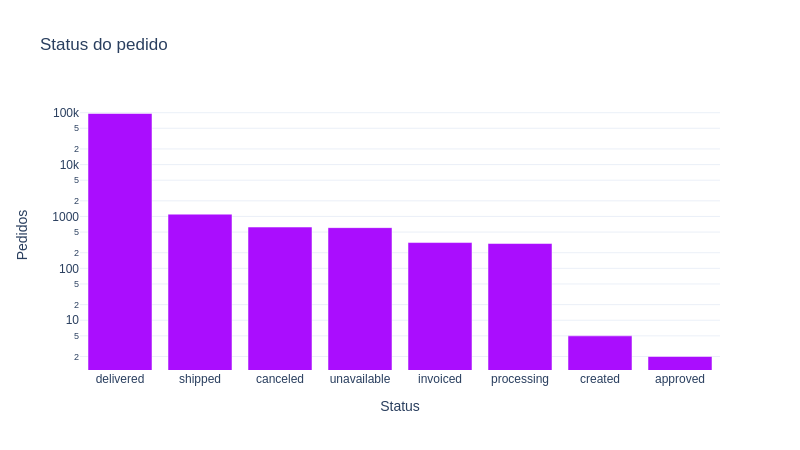

In [49]:
fig = px.bar(df_status, y='order_status', title='Status do pedido', log_y=True, labels={'order_status': 'Pedidos', 'index':'Status'},color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
gitly.show( fig )

In [50]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [51]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(3)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered


In [52]:
pd.to_datetime( df_compras['order_purchase_timestamp'], format='%Y-%m-%d')

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [53]:
lista_colunas_datas = list(df_compras.iloc[:13,3:].columns)
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [54]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime( df_compras[coluna], format='%Y-%m-%d')
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [55]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [56]:
df_compras_dt.iloc[0,:]

order_id                         e481f51cbdc54678b7cc49136f2d6af7
customer_id                      9ef432eb6251297304e76186b10a928d
order_status                                            delivered
order_purchase_timestamp                      2017-10-02 10:56:33
order_approved_at                             2017-10-02 11:07:15
order_delivered_carrier_date                  2017-10-04 19:55:00
order_delivered_customer_date                 2017-10-10 21:25:13
order_estimated_delivery_date                 2017-10-18 00:00:00
Name: 0, dtype: object

Eficiência na entrega

In [57]:
em_tempo = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).sum()
em_tempo

89996

Atrasados

In [58]:
total = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).count()
total

99441

In [59]:
atrasados = total - em_tempo
atrasados

9445

In [60]:
fig = px.pie( values=[em_tempo,atrasados], names=['Dentro do Estimado','Atrasados'], title='Efi')
fig.show()

In [61]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [62]:
df_compras_dt['numeric_month'] =  df_compras_dt.order_purchase_timestamp.dt.month
df_compras_dt['month'] =  df_compras_dt.order_purchase_timestamp.dt.month_name()
df_compras_dt['year'] =  df_compras_dt.order_purchase_timestamp.dt.year
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018


In [63]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [64]:
df_compras_mes =  df_compras_dt[['numeric_month','year','days_delivery_interval' ]].groupby( by='numeric_month' ).apply(np.mean)
df_compras_mes

,numeric_month,year,days_delivery_interval
numeric_month,,,
1,1.0,2017.900855,14.787334
2,2.0,2017.790785,19.312412
3,3.0,2017.728899,17.794198
4,4.0,2017.742695,13.106069
5,5.0,2017.650052,13.075381
6,6.0,2017.655227,11.290374
7,7.0,2017.609808,10.002326
8,8.0,2017.600572,7.801162
9,9.0,2017.002787,13.654588


In [65]:
df_compras_dt[['numeric_month']]

,numeric_month
0,10
1,7
2,8
3,11
4,2
...,...
99436,3
99437,2
99438,8
99439,1


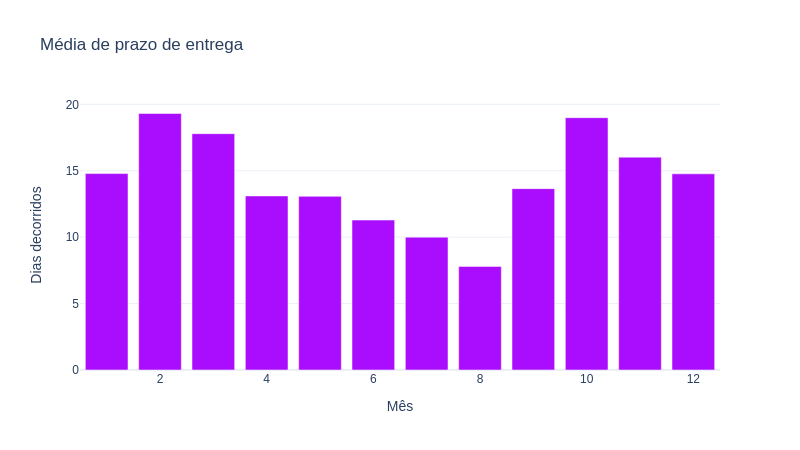

In [66]:
fig = px.bar(df_compras_mes, y='days_delivery_interval', title='Média de prazo de entrega', labels={'days_delivery_interval': 'Dias decorridos', 'index':'Mês'},color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
gitly.show( fig )

In [67]:
df_n_compras_mes = df_compras_dt.numeric_month.value_counts()
df_n_compras_mes_plot = df_n_compras_mes.reset_index().sort_values(by='index', ascending=True)
df_n_compras_mes_plot

,index,numeric_month
7,1,8069
6,2,8508
3,3,9893
5,4,9343
1,5,10573
4,6,9412
2,7,10318
0,8,10843
11,9,4305
10,10,4959


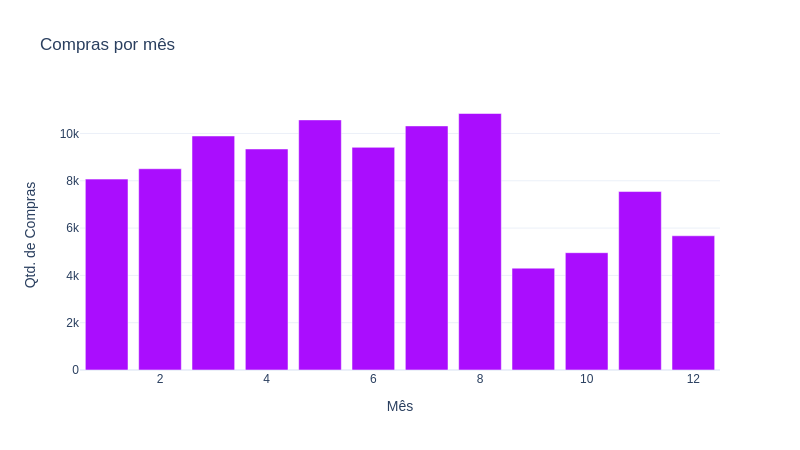

In [68]:
fig = px.bar(df_n_compras_mes_plot, x ='index' , y='numeric_month', title='Compras por mês', labels={'numeric_month': 'Qtd. de Compras', 'index':'Mês'},color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white')
gitly.show( fig )

In [69]:
df_compras_dt.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [70]:
df_compras_dt.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

XXXXXXXXXXXX

In [71]:
df_compras_dt.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,11,November,2017,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,2,February,2018,2


In [72]:
df_compra_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Dataset Items (Orders_Itens)

## Estrutura do Dataset

In [73]:
df_compra_itens.shape

(112650, 7)

In [74]:
df_compra_itens.agg(['nunique','count','size'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
nunique,98666,21,32951,3095,93318,5968,6999
count,112650,112650,112650,112650,112650,112650,112650
size,112650,112650,112650,112650,112650,112650,112650


## Informações para Negócios (Perguntas)

In [76]:
df_compra_itens.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73128,a6aef11a3026e113df62739da7de964e,1,25bf7c5e5f9d008845212122805014e5,d2374cbcbb3ca4ab1086534108cc3ab7,2017-07-27 11:03:12,18.9,11.85
9869,169f6274660e528484fd239aa7d27097,1,f71973c922ccaab05514a36a8bc741b8,5dceca129747e92ff8ef7a997dc4f8ca,2017-07-04 02:45:12,89.9,34.79
8226,12b63b3416a5f2cfb2db709782a07af5,1,dee46ab618429cbd3cdf24b2eb4c7f34,0b35c634521043bf4b47e21547b99ab5,2017-12-18 04:09:25,44.0,17.13
49893,715df31025aff2a2dd08b0d8c92ee63b,1,6281a79f478d260d81da138f7e03c0bb,79ebd9a61bac3eaf882805ed4ecfa12a,2018-05-25 04:31:13,124.9,43.45
96799,dbaa485d0f1b926d88f11b5c685d6bf2,1,270e70a55f9a0917f86b37cb32afcddd,94231344608e603693b0a8891143f65d,2018-06-15 10:30:57,239.0,61.73


Perguntas:
- Qual o produto mais vendido?
- **O frete do produto mais vendido muda de acordo com a região?**
- Qual o frete médio do produto mais vendido?
- Qual o top 5 vendedores?
- Quais produtos que os top 5 vendedores mais vendem?
- Variação de preço ao longo do tempo.
- Qual produto fatura mais?
- Venda de produto x Ano (top 5?)
- Volume de dinheiro em transações ao longo dos meses.
----------------------------------------------
Responder
- Qual o produto mais vendido?
- Qual o frete médio do produto mais vendido?
- Qual produto fatura mais?
- Qual o top 5 vendedores?
----------------------------------------------
Para casa:
- Variação de preço ao longo do tempo.
- Venda de produto x Ano (top 5?)
- Volume de dinheiro em transações ao longo dos meses.


In [146]:
# Produto mais vendido

df_compra_itens.groupby('product_id').sum().sort_values('order_item_id', ascending=False).head(1)['order_item_id']

product_id
422879e10f46682990de24d770e7f83d    793
Name: order_item_id, dtype: int64

In [136]:
# Preço médio do frete do produto mais vendido

df_compra_itens.loc[df_compra_itens.product_id==df_mais_vendido.index[0],('freight_value')].mean()

15.752148760330588

In [104]:
# Produto que mais fatura

df_compra_itens['billing'] = df_compra_itens['order_item_id']*df_compra_itens['price']


In [142]:
df_maiores_faturamentos = df_compra_itens.groupby('product_id').sum().sort_values('billing', ascending=False)['billing']
df_maiores_faturamentos.head(5)

product_id
bb50f2e236e5eea0100680137654686c    70485.00
5769ef0a239114ac3a854af00df129e4    60480.00
6cdd53843498f92890544667809f1595    57557.60
d1c427060a0f73f6b889a5c7c61f2ac4    50940.39
d6160fb7873f184099d9bc95e30376af    48899.34
Name: billing, dtype: float64

In [141]:
# Top 5 vendedores
df_compra_itens.groupby('seller_id').count().sort_values('order_id', ascending=False).head(5)['order_id']

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: order_id, dtype: int64

# Relacionamento de Datasets (Order_itens x Products)

Perguntas:
- Top 5 categorias mais unidades vendidas?
- Quanto cada categoria participa no faturamento total (%)?
- Existe relação entre o peso e o frete?

# Top 5 categorias com mais unidades vendida

In [147]:
# Top 5 categorias com mais unidades vendida
df_produtos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [148]:
df_compra_itens.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,billing
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


In [164]:
df_resultante = pd.merge(left=df_produtos[['product_id','product_category_name']],right=df_compra_itens[['product_id','order_item_id']],how='right',on='product_id')
df_resultante

,product_id,product_category_name,order_item_id
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1
1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1
2,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1
3,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1
4,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,1
...,...,...,...
112645,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim,1
112646,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao,1
112647,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes,1
112648,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,1


In [179]:
data = df_resultante.groupby('product_category_name').sum('order_item_id').sort_values('order_item_id',ascending=False)['order_item_id'].head(5)
data

product_category_name
cama_mesa_banho           13665
moveis_decoracao          11540
beleza_saude              11081
esporte_lazer              9932
informatica_acessorios     9874
Name: order_item_id, dtype: int64

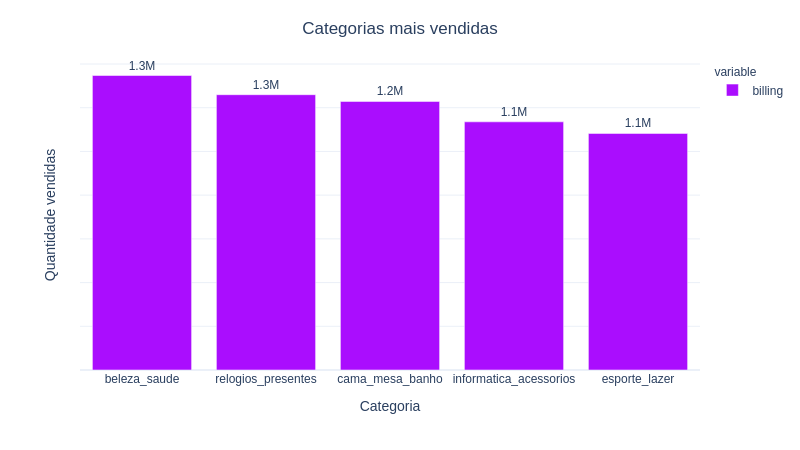

In [192]:
fig = px.bar(data,text='value',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white',labels={'product_category_name': 'Categoria', 'value':'Quantidade vendidas'})
fig.update_layout(title={'text' :'Categorias mais vendidas','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(showticklabels=False)
gitly.show(fig)

# Quanto cada categoria participa no faturamento total (%)

In [187]:
df_resultante1= pd.merge(left=df_produtos[['product_id','product_category_name']], right=df_compra_itens[['product_id','billing']], how='left', on='product_id')
df_resultante1.head()

,product_id,product_category_name,billing
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.90


In [190]:
data = df_resultante1.groupby('product_category_name').sum('billing').sort_values('billing',ascending=False)['billing'].head(5)
data

product_category_name
beleza_saude              1347468.49
relogios_presentes        1259634.58
cama_mesa_banho           1228795.46
informatica_acessorios    1135454.64
esporte_lazer             1082435.42
Name: billing, dtype: float64

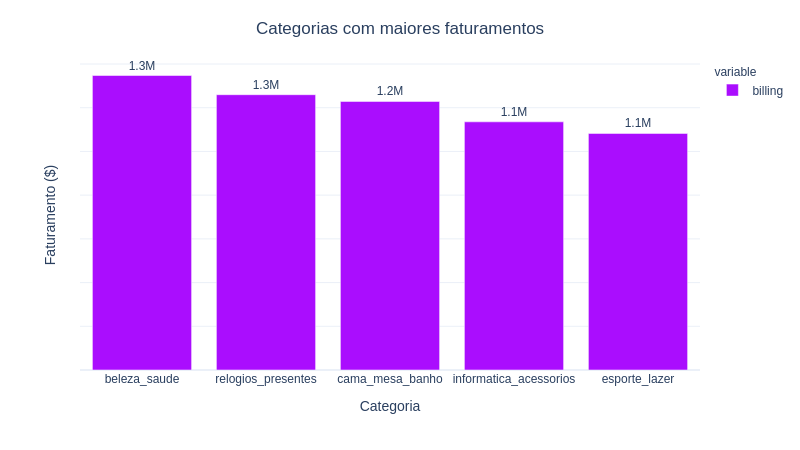

In [193]:
fig = px.bar(data,text='value',color_discrete_sequence=px.colors.qualitative.Alphabet,template='plotly_white',labels={'product_category_name': 'Categoria', 'value':'Faturamento ($)'})
fig.update_layout(title={'text' :'Categorias com maiores faturamentos','y': 0.95,'x': 0.5})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(showticklabels=False)
gitly.show(fig)